In this notebook,

    - We visualize the effects of L1 and L2 regularization. 
    - Explore the application of L1 regularization for identifying significant features.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

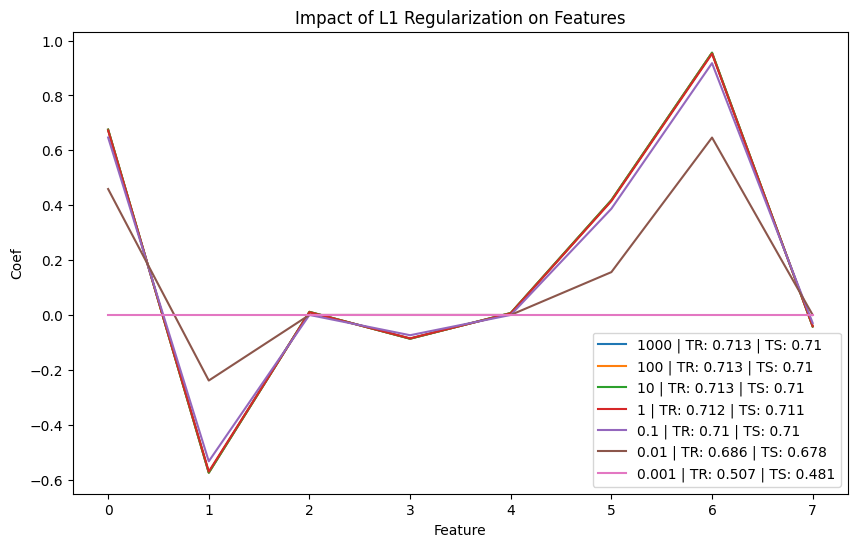

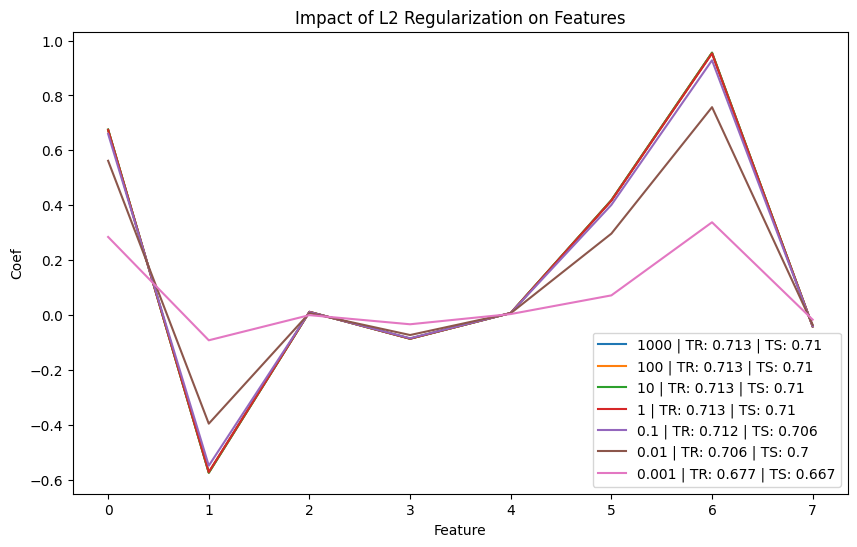

In [93]:
# Create a synthetic dataset
n_samples = 5000
feature_count = 8
important_feature_count = 4
X, y = make_classification(n_samples=n_samples, n_features=feature_count, 
                           n_informative=important_feature_count, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define regularization strengths (alphas)
alphas = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
alpha1_labels = []
alpha2_labels = []

plt.figure(figsize=(10, 6))
model1_coefs = []
for alpha in alphas:
    model1 = LogisticRegression(penalty='l1', C=alpha, solver='liblinear')
    model1.fit(X_train, y_train)
    alpha1_labels.append(str(alpha)+" | TR: "+str(round(model1.score(X_train, y_train),3))+" | TS: "+str(round(model1.score(X_test, y_test),3)))
    model1_coefs.append(model1.coef_[0])

plt.plot(np.array(model1_coefs).T, label=alpha1_labels)
plt.xlabel('Feature')
plt.ylabel('Coef')
plt.title('Impact of L1 Regularization on Features')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
model2_coefs = []
for alpha in alphas:
    model2 = LogisticRegression(penalty='l2', C=alpha, solver='liblinear')
    model2.fit(X_train, y_train)
    alpha2_labels.append(str(alpha)+" | TR: "+str(round(model2.score(X_train, y_train),3))+" | TS: "+str(round(model2.score(X_test, y_test),3)))
    model2_coefs.append(model2.coef_[0])

plt.plot(np.array(model2_coefs).T, label=alpha2_labels)
plt.xlabel('Feature')
plt.ylabel('Coef')
plt.title('Impact of L2 Regularization on Features')
plt.legend()
plt.show()


In [119]:
model1 = LogisticRegression(penalty='l1', C=1, solver='liblinear')
model1.fit(X_train[:,[0,1,3,5,6]], y_train)
print("TR: "+str(round(model1.score(X_train[:,[0,1,3,5,6]], y_train),3))+" | TS: "+str(round(model1.score(X_test[:,[0,1,3,5,6]], y_test),3)))

TR: 0.713 | TS: 0.713


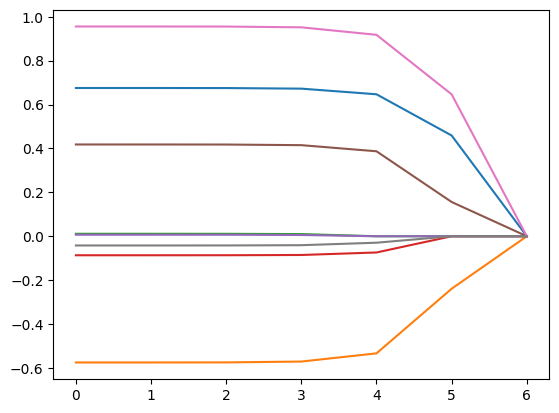

In [124]:
plt.plot(np.array(model1_coefs))

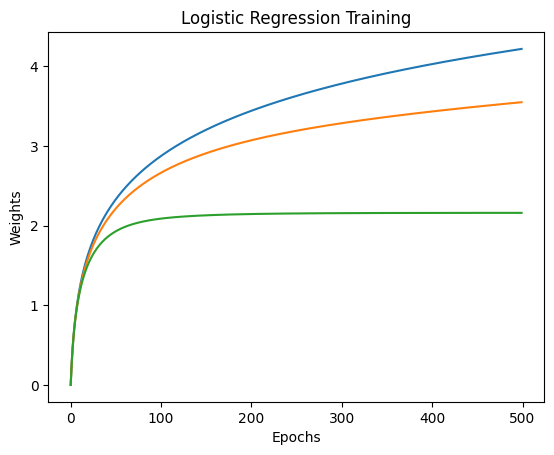

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the logistic loss (cross-entropy) function
def logistic_loss(y_true, y_pred):
    epsilon = 1e-15  # to avoid log(0) issues
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()

# Implement logistic regression from scratch
def logistic_regression(X, y, learning_rate, epochs, penality=None):
    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X))  # Add bias term

    # Initialize weights
    w = np.zeros(n + 1)

    # Lists to store loss for visualization
    losses = []
    
    # Lists to store Weights for visualization
    weights = []
    for epoch in range(epochs):
        weights.append(w)
        # Compute predicted probabilities
        y_pred = sigmoid(np.dot(X, w))

        # Compute the gradient of the loss with respect to weights
        if penality == None:
            gradient = (np.dot(X.T, (y_pred - y))) / m
        elif penality = 'l1':
            gradient = (np.dot(X.T, (y_pred - y)) + np.sign(w)) / m
        elif penality = 'l2':
            gradient = (np.dot(X.T, (y_pred - y)) + (2*w)) / m
        # Update weights using gradient descent
        w = w - (learning_rate * gradient)
        # Compute and store the loss
        loss = logistic_loss(y, y_pred)
        losses.append(loss)
    return weights, losses

# Generate synthetic data for demonstration
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = (4 + 3 * X + np.random.randn(100, 1) > 0).astype(int).flatten()

# Apply logistic regression
weights, losses = logistic_regression(X, y, learning_rate=0.5, epochs=500)
l1_weights, losses = logistic_regression_l1(X, y, learning_rate=0.5, epochs=500)
l2_weights, losses = logistic_regression_l2(X, y, learning_rate=0.5, epochs=500)

# Plot the loss over epochs
plt.plot(np.array(weights)[:,0])
plt.plot(np.array(l1_weights)[:,0])
plt.plot(np.array(l2_weights)[:,0])
plt.xlabel('Epochs')
plt.ylabel('Weights')
plt.title('Logistic Regression Training')
plt.show()


In [26]:
l = np.array(l1_weights)[:,0]

In [31]:
[(l[i]-l[i+1])/l[i] for i in range(len(l)-2)]

[-0.0,
 -1.333705746109789,
 -2.924507586484918,
 -4.7434565001126145,
 -6.744492005770842,
 -8.895592473543624,
 -11.174479219609134,
 -13.565118690027552,
 -16.055539883064768,
 -18.636507592093828,
 -21.300697139684953,
 -24.042163226061433,
 -26.855985993047348,
 -29.738027461766848,
 -32.68475901358191,
 -35.69313602284224,
 -38.76050466916681,
 -41.8845312691367,
 -45.06314772595551,
 -48.294508750725015,
 -51.57695783852252,
 -54.908999863029656,
 -58.28927874925837,
 -61.71655909504827,
 -65.1897109008421,
 -68.70769677349786,
 -72.26956111949168,
 -75.87442095279319,
 -79.52145802462549,
 -83.20991204401493,
 -86.93907480509353,
 -90.70828507330008,
 -94.51692411079057,
 -98.36441174342663,
 -102.25020288915148,
 -106.1737844814833,
 -110.13467273301748,
 -114.13241069282113,
 -118.16656605898834,
 -122.23672921359336,
 -126.34251145221621,
 -130.48354338438745,
 -134.6594734845348,
 -138.8699667760767,
 -143.11470363349676,
 -147.39337868936244,
 -151.70569983495614,
 -156.05

In [32]:
l

array([0.        , 0.25      , 0.43744764, 0.58702758, 0.71078281,
       0.81616996, 0.90791989, 0.98916931, 1.06208937, 1.12824033,
       1.18877958, 1.24458901, 1.29635594, 1.34462659, 1.38984232,
       1.43236496, 1.47249494, 1.51048451, 1.54654758, 1.58086714,
       1.61360103, 1.64488634, 1.67484293, 1.70357622, 1.73117945,
       1.75773547, 1.78331828, 1.8079942 , 1.83182297, 1.85485855,
       1.87714987, 1.89874143, 1.91967382, 1.93998419, 1.95970661,
       1.97887241, 1.99751046, 2.01564744, 2.03330804, 2.05051518,
       2.06729013, 2.08365271, 2.09962142, 2.1152135 , 2.13044511,
       2.14533139, 2.15988653, 2.17412387, 2.18805597, 2.20169466,
       2.21505107, 2.22813573, 2.24095861, 2.2535291 , 2.26585614,
       2.27794817, 2.28981323, 2.30145893, 2.31289253, 2.32412091,
       2.33515065, 2.34598801, 2.35663895, 2.36710918, 2.37740414,
       2.38752904, 2.39748885, 2.40728834, 2.41693208, 2.42642443,
       2.4357696 , 2.4449716 , 2.45403431, 2.46296144, 2.47175